Dataclasses & Pydantic Models
=============================


Dataclasses
===========

Dataclasses can easily be registered with their GUI.

*Note: Fiatlight is unable to auto-generate a serialization/deserialization mechanism for dataclasses.
If you need this, it is advised to use Pydantic models instead.*


*Example: using a dataclass in a function*

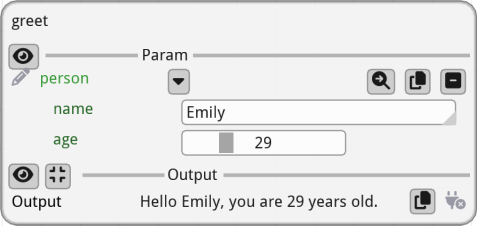

In [4]:
import fiatlight as fl
from dataclasses import dataclass

# Using a decorator to register the dataclass with its GUI
@fl.dataclass_with_gui_registration(age__range=(0, 120))
class Person:
    name: str
    age: int

# Note: it is also possible to register the dataclass with the commented line below
#    fl.register_dataclass(Person)

def greet(person: Person) -> str:
    return f"Hello {person.name}, you are {person.age} years old."

# Note: this app *will not* remember the values of the dataclass fields between runs
fl.run(greet, app_name="Dataclass Person")

Pydantic models
===============

Pydantic models can easily be registered with their GUI.

*Notes:*
- *fiatlight will automatically generate a serialization/deserialization mechanism for Pydantic models, so that user entries can be saved and reloaded.*
- *models can be nested: in the example below, you will see 3 levels of nesting, and fiatlight will generate a nice GUI for those nestings.*


*Example: using a Pydantic model in a function*

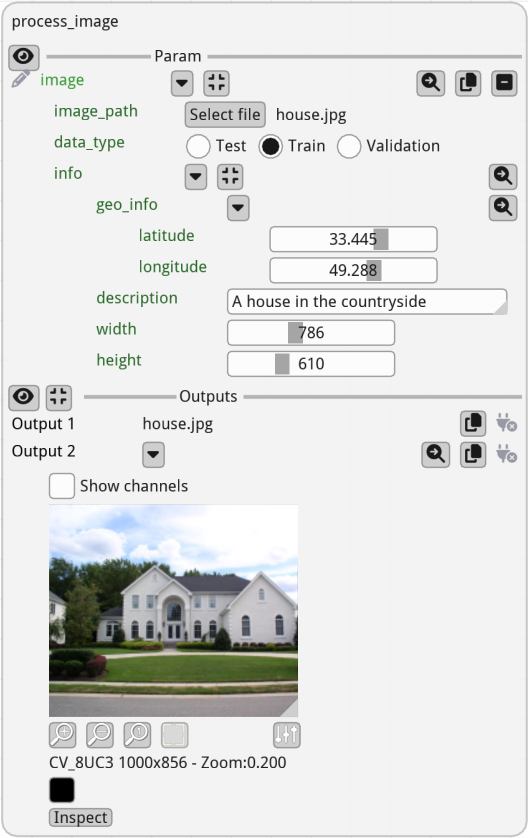

In [5]:
import fiatlight as fl
from enum import Enum
from fiatlight.fiat_types import ImagePath
from fiatlight.fiat_kits.fiat_image import ImageU8_3
from pydantic import BaseModel
import cv2

# An Enum which will associated to a Gui automatically
class TrainingDataType(Enum):
    Test = "test"
    Train = "train"
    Validation = "validation"


# A Pydantic model with a GUI decorator, and custom fiat attributes for the fields
@fl.base_model_with_gui_registration(latitude__range=(-90, 90), longitude__range=(-180, 180))
class GeographicInfo(BaseModel):
    latitude: float
    longitude: float

# Note: it is also possible to register the Pydantic model with the commented line below
#     fl.register_base_model(GeographicInfo)


# A second model, which nests the first one (GeographicInfo)
@fl.base_model_with_gui_registration(width__range=(0, 2000), height__range=(0, 2000))
class ImageInfo(BaseModel):
    geo_info: GeographicInfo
    description: str
    width: int
    height: int

# A third model, which nests the second one (ImageInfo)
# In total, it has 3 levels: TrainingImage -> ImageInfo -> GeographicInfo
@fl.base_model_with_gui_registration()
class TrainingImage(BaseModel):
    image_path: ImagePath
    data_type: TrainingDataType
    info: ImageInfo

# Our function that uses the Pydantic model:
# we ought to see a nice GUI with 3 levels of nesting
def process_image(image: TrainingImage) -> tuple[str, ImageU8_3]:
    import os
    basename = os.path.basename(image.image_path)
    img = cv2.imread(image.image_path)
    return basename, img

# Note: this app *will* remember the values of the Pydantic model fields between runs
fl.run(process_image, app_name="Pydantic Image Model")